In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.path.exists('student_grades.csv')

True

In [4]:
def acquire_student_grades():
    if os.path.exists('student_grades.csv'):
        return pd.read_csv('student_grades.csv')
    else:
        print('El .csv no esta aqui')

In [5]:
df = acquire_student_grades()

In [19]:
def gimmie_the_deets(df):
    print('--------info-------')
    print(df.info())
    print('--------describe-------')
    print(df.describe())
    print('--------head-------')
    print(df.head())

In [20]:
gimmie_the_deets(df)

--------info-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB
None
--------describe-------
       student_id       exam1       exam2       exam3  final_grade
count  104.000000  103.000000  104.000000  103.000000   104.000000
mean    52.500000   78.398058   77.307692   84.242718    81.692308
std     30.166206   14.339948   10.295703    8.709321    10.918122
min      1.000000   57.000000   65.000000   70.000000    65.000000
25%     26.750000   70.000000   70.000000   78.000000    72.000000
50%     52.500000   79.000000   75.000000   85.000000    81.000000
75%     78.250000   92.000000   89

Immediate takeaways:
- student_id may be arbitrary
- exam 2 is an int, others are floats
- exam 1 and 3 are missing values

### What do we want to know about this data?

#### What may we want to predict?

In [21]:
# planning and problem statement
# Can we predict what the final grade of a student will be based on previous exam scores?

In [23]:
# first thing; drop the sudent id column
df = df.drop(columns='student_id')

In [24]:
# no real utility to this, but can be used to maintain congruency with the student_id col we dropped,
# so the index starts at 1 instead of 0.
df.index = [i + 1 for i in df.index.to_list()]

In [25]:
df.head()

,exam1,exam2,exam3,final_grade
1,100.0,90,95.0,96
2,98.0,93,96.0,95
3,85.0,83,87.0,87
4,83.0,80,86.0,85
5,93.0,90,96.0,97


Now to find our Null values

In [26]:
df.isna().sum()

exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [28]:
df['exam1'].isna().value_counts()

False    103
True       1
Name: exam1, dtype: int64

In [29]:
df.dropna().shape

(102, 4)

In [30]:
#It makes the most sense here to simply drop the null values because theres only 2 of them,
# and trying to fill in a missing exam grade isnt a very safe bet.
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exam1        102 non-null    float64
 1   exam2        102 non-null    int64  
 2   exam3        102 non-null    float64
 3   final_grade  102 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 4.0 KB


Now our nulls are gone, lets fix dtype for exam

In [32]:
#We can compare a float value to an int value 
100.0 == 100

True

In [35]:
df['exam1'] = df['exam1'].astype(int)
df['exam3'] = df['exam3'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        102 non-null    int64
 1   exam2        102 non-null    int64
 2   exam3        102 non-null    int64
 3   final_grade  102 non-null    int64
dtypes: int64(4)
memory usage: 4.0 KB


In [37]:
def clean_student_grades(df):
    '''
    clean_student grades will take in a single pandas dataframe, 
    with the expected formatting observed in student_grades.
    It will remove studebt_id column,
    It will remove and records containing null values,
    And it will cast any floats to integers
    
    Arguments: df. a pandas dataframe
    return: df, a pandas dataframe (cleaned)
    '''
    #drop student_id column
    df = df.drop(columns='student_id')
    #drop nulls
    df = df.dropna()
    #convert to int: the whole df in 1 line instead of two lines to convert two columns
    df = df.astype(int)
    return df

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
def split_my_students(df):
    '''
    split_my_students will take in a single pandas df referencing a cleaned
    version of student_grades, and will then split the data into train,
    validate, and test sets
    
    Arguments: df. a pandas dataframe
    return: train, validate, test: the pandas df split from orginal df 
    '''
    train_val, test = train_test_split(df, random_state = 1349, train_size = 0.7)
    train, validate = train_test_split(train_val, random_state = 1349, train_size = 0.8)
    return train, validate, test

In [40]:
def wrangle_grades():
    '''
    wrangle_grades will go through the process of acquiring stufent grades data from 
    a local .csv, cleaning the data, then splitting into train, test, and validate
    '''
    return split_my_students(
        clean_student_grades(
            acquire_student_grades()))

In [41]:
train, validate, test = wrangle_grades()

In [42]:
train.shape, validate.shape, test.shape

((56, 4), (15, 4), (31, 4))

In [43]:
train.head()

,exam1,exam2,exam3,final_grade
82,93,90,96,97
76,57,65,75,65
19,92,89,94,93
92,98,93,96,95
34,70,65,78,77


Lets check out how normal things are:

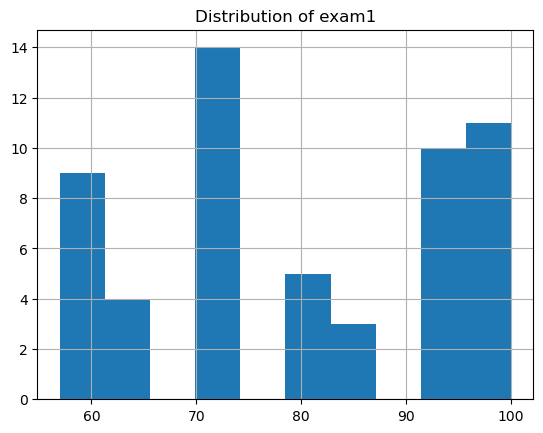

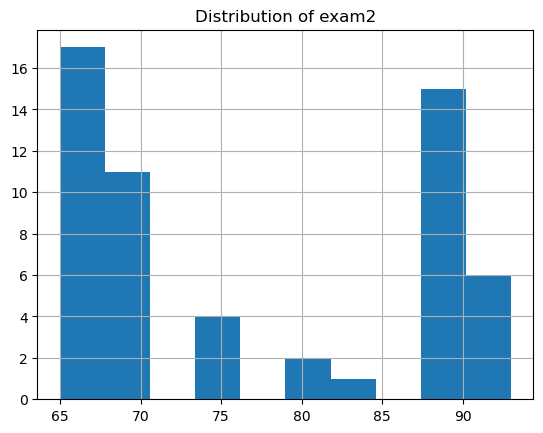

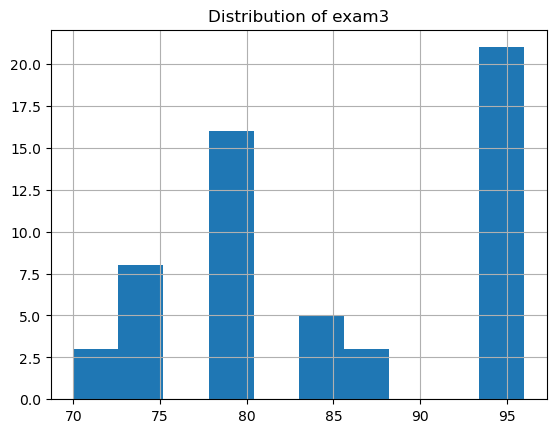

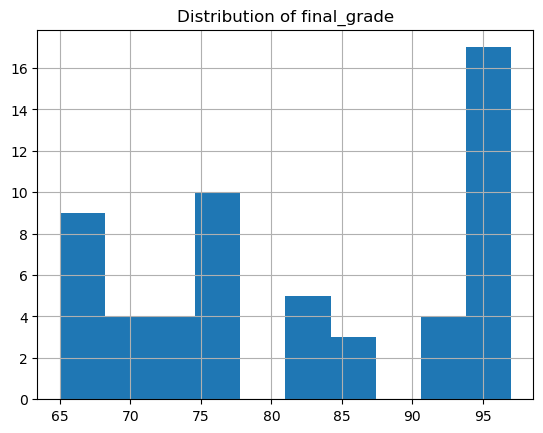

In [44]:
for col in train:
    train[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

My data isnt super normal. 

Is this because the sample size is somewhat small?
Is this because there are different types of students
If so, how would i recognize them?
Will this effect my modeing?